In [ ]:
pip install networkx pandas matplotlib

In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Sample financial transaction data
data = {
    'Sender': ['A1', 'A1', 'A2', 'A3', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8'],
    'Receiver': ['A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A9', 'A10'],
    'Amount': [1000, 2000, 500, 1200, 2500, 3000, 1500, 3500, 6000, 4000]
}
df = pd.DataFrame(data)

# Create a directed graph with edge weights (amounts)
G = nx.from_pandas_edgelist(df, source='Sender', target='Receiver', edge_attr='Amount', create_using=nx.DiGraph())

# Compute shortest path based on number of hops (not amount)
try:
    path = nx.shortest_path(G, source='A1', target='A10')
    print("Shortest path (by number of transactions) from A1 to A10:", path)
except nx.NetworkXNoPath:
    print("No path found from A1 to A10.")


Shortest path (by number of transactions) from A1 to A10: ['A1', 'A3', 'A5', 'A8', 'A10']


In [ ]:
G = nx.from_pandas_edgelist(df, source='Sender', target='Receiver', edge_attr='Amount', create_using=nx.DiGraph())

print(f"Graph created with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")

Graph created with 10 nodes and 10 edges.


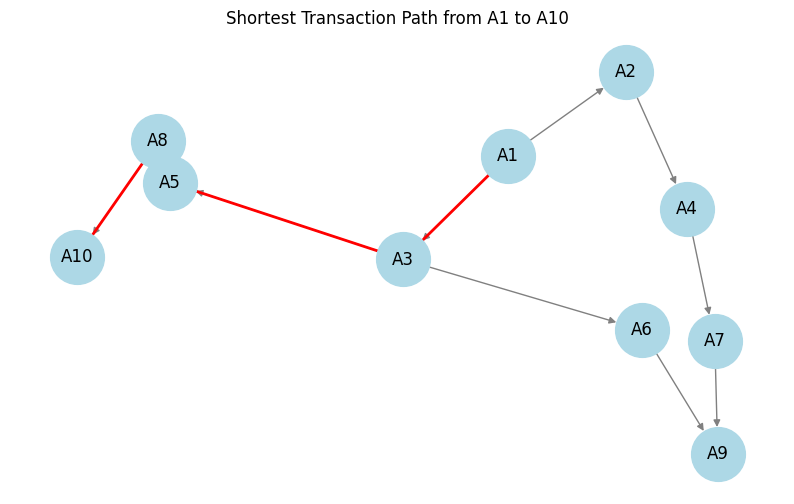

In [ ]:
# Draw the graph with highlighted shortest path
pos = nx.spring_layout(G)

plt.figure(figsize=(10, 6))
nx.draw_networkx(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=1500, arrows=True)

# Highlight the path in red
path_edges = list(zip(path[:-1], path[1:]))
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2)

plt.title("Shortest Transaction Path from A1 to A10")
plt.axis('off')
plt.show()
